In [175]:
import pandas as pd
import numpy as np
import os
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.express as px
import pandas as pd
from PIL import Image
from wordcloud import WordCloud
from datetime import datetime
import datetime
import dash_table
from dash.dependencies import Input, Output
import plotly.graph_objects as go
import networkx as nx
from plotly.subplots import make_subplots

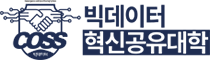

In [15]:
img = Image.open('bd_logo.png')
img

In [11]:
test_dt = pd.read_excel('dashboard_dt_1.xlsx',index_col=0)
test_dt.head()

,0,1,대학생,대학원생,교직원,교수,일반인,test_result1,test_result2,test_result3,test_result4,test_result5,tfidf1,tfidf2,tfidf3,tfidf4,tfidf5
0,칠암 창업보육센터 입주업체를,당 센터에서는 신기술과 신제품 개발로 지역 산업의 새로운 도약을 선도할 우수한 창업...,1,1,1,1,1,1,1,1,1,1,1.0,1.0,0.0,0.0,1.0
2,예비군연대 근로장학생 모집 안 내가 좌 캠퍼스,예비군연대 근로장학생 모집 예비군연대가 좌 캠퍼스 교내 근로장학생을 모집합니다 아래...,1,0,0,0,0,1,0,0,0,0,NaN,NaN,NaN,NaN,NaN
3,지속 가능발전 목표 인식 제고를 위한 교육 개최,지속 가능발전 목표 인식 제고를 위한 교육을 다음과 같이 개최하오니 관심 있는 분들...,1,1,1,1,1,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN
4,안내 병역판정 검사 일자 및 장소 본인 선택 안내,병무청에서는 병역판정 검사 대상자가 편리하고 자율적으로 병역의무를 이행할 수 있도록...,1,1,1,0,0,1,1,1,0,0,NaN,NaN,NaN,NaN,NaN
5,홍보 자이언 티원 슈타인 콘서트 교직원 및 학생 할인 안내,안녕하세요 단계적 일상 회복 전환에 따른 사회적 거리두기 지침이 개편됨에 따라 주전...,1,1,1,0,0,1,1,1,0,0,NaN,NaN,NaN,NaN,NaN


In [12]:
train_dt = pd.read_excel('dashboard_dt_2.xlsx',index_col=0)
train_dt.head()

,0,1,대학생,대학원생,교직원,교수,일반인,review,day,department
0,단체협약 체결을 위한 교섭요구 노동조합의 확정 공고,교섭요구 노동조합의 확정 공고 노동조합 및 노동관계조정법 시행령 규정에 따라 교섭요...,0,0,1,1,0,46,2021.02.25,교무과
1,경상대 변경 통학 노선버스 운행시간,통학 노선버스 관련 운행시간 변동 사항 안내 자로 운행하는 통학 노선버스는 기존 운...,1,1,1,0,0,213,2021.03.01,학생과
2,경상대 상반기 퇴직 공무원 정부포상 추천 후보자 공개검증,상반기 퇴직 공무원 포상 추천 후보자에 대해 아래와 같이 공개검증을 실시하오니 의견...,1,1,1,1,1,130,2021.03.01,총무과
3,사회적 창업 아이디어 경진대회 참가자 모집 공고,지자체 대학 협력 기반 지역 혁신사업 경남지역 혁신 플랫폼 스마트 공동체 사업단 사...,1,1,0,0,0,165,2021.03.03,스마트공동체사업단
4,재학생 등록금 납부 안내,재학생 등록금 추가 수납 일정을 아래와 같이 알려드리니 해당 학생들께서는 등록기간 ...,1,1,0,0,0,517,2021.03.03,재무과


In [337]:
train_dt

,0,1,대학생,대학원생,교직원,교수,일반인,review,day,department
0,단체협약 체결을 위한 교섭요구 노동조합의 확정 공고,교섭요구 노동조합의 확정 공고 노동조합 및 노동관계조정법 시행령 규정에 따라 교섭요...,0,0,1,1,0,46,2021-02-25,교무과
1,경상대 변경 통학 노선버스 운행시간,통학 노선버스 관련 운행시간 변동 사항 안내 자로 운행하는 통학 노선버스는 기존 운...,1,1,1,0,0,213,2021-03-01,학생과
2,경상대 상반기 퇴직 공무원 정부포상 추천 후보자 공개검증,상반기 퇴직 공무원 포상 추천 후보자에 대해 아래와 같이 공개검증을 실시하오니 의견...,1,1,1,1,1,130,2021-03-01,총무과
3,사회적 창업 아이디어 경진대회 참가자 모집 공고,지자체 대학 협력 기반 지역 혁신사업 경남지역 혁신 플랫폼 스마트 공동체 사업단 사...,1,1,0,0,0,165,2021-03-03,스마트공동체사업단
4,재학생 등록금 납부 안내,재학생 등록금 추가 수납 일정을 아래와 같이 알려드리니 해당 학생들께서는 등록기간 ...,1,1,0,0,0,517,2021-03-03,재무과
...,...,...,...,...,...,...,...,...,...,...
7,교외장학금 재 재일한국인 본국투자 협회 장학생 모집 안내,재 재일한국인 본국투자 협회에서는 국내에서 수학하고 있는 재일 동포 학생들을 대상으...,1,0,0,0,0,173,2021-12-20,학생과
8,농림축산식품부 청년 창업농 농식품 인재 농업인 자녀 장학생 선발 안내,선발 공고 농업인 자녀 장학생 장학생을 다음과 같이 선발하고자 하니 대학생 여러분의...,1,0,0,0,0,531,2021-12-20,학생과
9,해양수산부 수산 후 계 장학생 선발 안내,수산 훈계 장학금 지원내용 학기당 지원 대상 자격요건 신규자 해양수산계열 대학 해양...,1,0,0,0,0,198,2021-12-20,학생과
10,대학생 청소년교육지원 사업 멘토 추가 선발 결과 안내,대학생 청소년교육지원 사업 멘토 대체 추가 선발 결과 안내 대학생 청소년교육지원 사...,1,0,0,0,0,301,2021-12-22,학생과


In [20]:
train_dt.day = pd.to_datetime(train_dt.day)

In [21]:
train_dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1226 entries, 0 to 11
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   0           1226 non-null   object        
 1   1           1226 non-null   object        
 2   대학생         1226 non-null   int64         
 3   대학원생        1226 non-null   int64         
 4   교직원         1226 non-null   int64         
 5   교수          1226 non-null   int64         
 6   일반인         1226 non-null   int64         
 7   review      1226 non-null   object        
 8   day         1226 non-null   datetime64[ns]
 9   department  1226 non-null   object        
dtypes: datetime64[ns](1), int64(5), object(4)
memory usage: 105.4+ KB


In [38]:
high_dpartment_frequency=pd.DataFrame(train_dt.groupby('department').count().sort_values(by='대학생',ascending=False).iloc[:15,:][1])

In [42]:
high_dpartment_frequency.columns = ['freq']
high_dpartment_frequency.columns

Index(['freq'], dtype='object')

In [71]:
month_freq = train_dt[train_dt.day>datetime(2021,1,1)]

In [84]:
lst = []
for i in range(month_freq.shape[0]):
    lst.append(month_freq.iloc[i,8].month)
month_freq['month'] = lst

<ipython-input-84-f85a2a6d24fe>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [99]:
month_freq2 = pd.DataFrame(month_freq.groupby('month').count()[0])
month_freq2.columns = ['freq']

In [102]:
month_freq2

,freq
month,
1,1
2,16
3,90
4,115
5,94
6,98
7,117
8,93
9,85


In [103]:
month_freq_fig = px.line(month_freq2,x=month_freq2.index, y='freq')
month_freq_fig.add_bar(x=month_freq2.index, y=month_freq2.freq)

In [47]:
high_department_freq_fig = px.bar(high_dpartment_frequency,x=high_dpartment_frequency.index,y='freq')
high_department_freq_fig.write_html('high_department.html')

In [114]:
lst = []
for i in month_freq.month.tolist():
    if i in [1,2,3]:
        lst.append('1st quarter')
    elif i in [4,5,6]:
        lst.append('2nd quarter')
    elif i in [7,8,9]:
        lst.append('3rd quarter')
    else:
        lst.append('4th quarter')


In [115]:
month_freq['quarter'] = lst

<ipython-input-115-27b6a14649c0>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [118]:
quarter_freq = month_freq.groupby('quarter')[['대학생','대학원생','교직원','교수','일반인']].sum()

In [129]:
quarter_freq.values[0]

array([[ 57,  23,  15,  13,  56],
       [199, 124,  31,  27, 161],
       [176,  97,  24,  23, 163],
       [213, 103,  40,  34, 132]], dtype=int64)

In [133]:
quarter_freq.columns.tolist()

['대학생', '대학원생', '교직원', '교수', '일반인']

In [150]:
quarter_freq_fig = make_subplots(rows=1, cols=4,specs=[[{'type':'domain'},{'type':'domain'},{'type':'domain'},{'type':'domain'}]])
quarter_freq_fig.add_trace(go.Pie(labels=quarter_freq.columns, values = quarter_freq.values[0], hole=.3,title='1st quarter'),row=1,col=1)
quarter_freq_fig.add_trace(go.Pie(labels=quarter_freq.columns, values = quarter_freq.values[1], hole=.3,title='2nd quarter'),row=1,col=2)
quarter_freq_fig.add_trace(go.Pie(labels=quarter_freq.columns, values = quarter_freq.values[2], hole=.3,title='3rd quarter'),row=1,col=3)
quarter_freq_fig.add_trace(go.Pie(labels=quarter_freq.columns, values = quarter_freq.values[3], hole=.3,title='4th quarter'),row=1,col=4)

In [189]:
month_freq.review = month_freq.review.str.replace(',','')
month_freq.review = month_freq.review.astype('int')

C:\Users\a3011\anaconda3\lib\site-packages\pandas\core\generic.py:5170: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [190]:
month_freq.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1015 entries, 0 to 11
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   0           1015 non-null   object        
 1   1           1015 non-null   object        
 2   대학생         1015 non-null   int64         
 3   대학원생        1015 non-null   int64         
 4   교직원         1015 non-null   int64         
 5   교수          1015 non-null   int64         
 6   일반인         1015 non-null   int64         
 7   review      1015 non-null   int32         
 8   day         1015 non-null   datetime64[ns]
 9   department  1015 non-null   object        
 10  month       1015 non-null   int64         
 11  quarter     1015 non-null   object        
dtypes: datetime64[ns](1), int32(1), int64(6), object(4)
memory usage: 119.1+ KB


In [193]:
day_review = month_freq.groupby('day')['review'].mean()

In [196]:
day_review = pd.DataFrame(day_review)

In [197]:
day_review_fig = px.line(day_review,x=day_review.index, y='review')

In [204]:
training_accuracy = pd.DataFrame([[0.6554,	0.8096,	0.877,	0.901,	0.91],[0.7959,	0.879,	0.879,	0.902,	0.8948]])
training_accuracy.columns = ['epoch1','epoch2','epoch3','epoch4','epoch5']
training_accuracy = training_accuracy.set_index([['Train','Valid']])
training_accuracy = training_accuracy.T

In [217]:
train_accuracy_fig = px.line(training_accuracy,x=training_accuracy.index,y=['Train','Valid'])

In [232]:
train_accuracy_fig = go.Figure(data=[go.Scatter(x=training_accuracy.index,y=training_accuracy.values.T[0],mode='lines',name='Train'),
                          go.Scatter(x=training_accuracy.index,y=training_accuracy.values.T[1],mode='lines',name='Valid')])

In [208]:
score = pd.DataFrame([[0.9259,0.7777],[0.9931,0.9655],[0.9862,0.9655]])
score.columns = ['individual_accuracy','perfect_accuracy']
score = score.set_index([['Labeling vs Predict','Labeling vs TF-IDF','Predict vs TF-IDF']])
score

,individual_accuracy,perfect_accuracy
Labeling vs Predict,0.9259,0.7777
Labeling vs TF-IDF,0.9931,0.9655
Predict vs TF-IDF,0.9862,0.9655


In [233]:
score2 = [[0.9259,0.9931,0.9862],[0.7777,0.9655,0.9655]]
x_names = ['Labeling vs Predict','Labeling vs TF-IDF','Predict vs TF-IDF']
score_fig = go.Figure(data=[go.Bar(name='individual_accuracy',x=x_names,y=score2[0]),
                           go.Bar(name='perfect_accuracy',x=x_names,y=score2[1])])
#bar(score,x=score.index,y=['individual_accuracy','perfect_accuracy'])

In [305]:
test_dt = pd.read_excel('C:\\Users\\a3011\\빅데이터 공유혁신 공모전 준비\\test_integrate_data.xlsx',index_col=0)

In [306]:
test_dt.head()

,0,1,labeling_대학생,labeling_대학원생,labeling_교직원,labeling_교수,labeling_일반인,predict_대학생,predict_대학원생,predict_교직원,...,tfidf_교수,tfidf_일반인,article_idx1,article_idx2,article_idx3,article_idx4,article_idx5,article_idx6,article_idx7,review_means
0,칠암 창업보육센터 입주업체를,당 센터에서는 신기술과 신제품 개발로 지역 산업의 새로운 도약을 선도할 우수한 창업...,1,1,1,1,1,1,1,1,...,0.0,1.0,108.0,172.0,NaN,NaN,NaN,NaN,NaN,99.5
2,예비군연대 근로장학생 모집 안 내가 좌 캠퍼스,예비군연대 근로장학생 모집 예비군연대가 좌 캠퍼스 교내 근로장학생을 모집합니다 아래...,1,0,0,0,0,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,지속 가능발전 목표 인식 제고를 위한 교육 개최,지속 가능발전 목표 인식 제고를 위한 교육을 다음과 같이 개최하오니 관심 있는 분들...,1,1,1,1,1,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,안내 병역판정 검사 일자 및 장소 본인 선택 안내,병무청에서는 병역판정 검사 대상자가 편리하고 자율적으로 병역의무를 이행할 수 있도록...,1,1,1,0,0,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,홍보 자이언 티원 슈타인 콘서트 교직원 및 학생 할인 안내,안녕하세요 단계적 일상 회복 전환에 따른 사회적 거리두기 지침이 개편됨에 따라 주전...,1,1,1,0,0,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [313]:
reset_columns = test_dt.columns.tolist()
reset_columns[0] = 'title'
reset_columns[1] = 'context'
test_dt.columns = reset_columns

In [314]:
tf_idf_labeling = test_dt[test_dt.tfidf_대학생.isna()!= True]
labeling_necessary = test_dt[test_dt.tfidf_대학생.isna()]

In [316]:
tf_idf_labeling.head()

,title,context,labeling_대학생,labeling_대학원생,labeling_교직원,labeling_교수,labeling_일반인,predict_대학생,predict_대학원생,predict_교직원,...,tfidf_교수,tfidf_일반인,article_idx1,article_idx2,article_idx3,article_idx4,article_idx5,article_idx6,article_idx7,review_means
0,칠암 창업보육센터 입주업체를,당 센터에서는 신기술과 신제품 개발로 지역 산업의 새로운 도약을 선도할 우수한 창업...,1,1,1,1,1,1,1,1,...,0.0,1.0,108.0,172.0,NaN,NaN,NaN,NaN,NaN,99.5
2,강원대학교 교류 수학 안내,강원대학교 교류 수학에 관해 안내드립니다 희망하는 학생은 학과사무실을 통하여 관련 ...,1,0,0,0,0,1,0,0,...,0.0,0.0,446.0,459.0,NaN,NaN,NaN,NaN,NaN,199.5
3,전북대학교 교류 수학 안내,전북대학교 교류 수학에 관해 안내드립니다 희망하는 학생은 학과사무실을 통하여 관련 ...,1,0,0,0,0,1,0,0,...,0.0,0.0,446.0,459.0,460.0,NaN,NaN,NaN,NaN,161.0
4,동계 계절학기 강의 만족도 조사 실시 안내,동계 계절학기 강의 만족도 조사 안내 동계 계절학기 강의 만족도 조사를 아래와 같이...,1,0,0,0,0,1,0,0,...,0.0,0.0,442.0,NaN,NaN,NaN,NaN,NaN,NaN,260.0
5,구경 상대 학교 전기 수료 유예 및 학사학위 취득 유예 신청 안내,관련 경상 국립대학교 수료 유예 및 학사학위 취득 유예 운영지침 전기 수료 유예 및...,1,0,0,0,0,1,0,0,...,0.0,0.0,443.0,NaN,NaN,NaN,NaN,NaN,NaN,435.0


In [351]:
a_most_see = tf_idf_labeling[tf_idf_labeling.tfidf_대학생 == 1][['title','review_means']].sort_values('review_means',ascending=False)
b_most_see = tf_idf_labeling[tf_idf_labeling.tfidf_대학원생 == 1][['title','review_means']].sort_values('review_means',ascending=False)
c_most_see = tf_idf_labeling[tf_idf_labeling.tfidf_교직원 == 1][['title','review_means']].sort_values('review_means',ascending=False)
d_most_see = tf_idf_labeling[tf_idf_labeling.tfidf_교수 == 1][['title','review_means']].sort_values('review_means',ascending=False)
e_most_see = tf_idf_labeling[tf_idf_labeling.tfidf_일반인 == 1][['title','review_means']].sort_values('review_means',ascending=False)

ValueError: Shape of passed values is (24, 4), indices imply (16, 4)

In [350]:
student_most_see

,title,review_means
12,구경 상대 학교 복수전공 및 부전공 연계전공 융합전공 포함 시행 안내,1302.000000
1,하반기 일본 파견 교환학생 선발 공고,760.000000
0,교외장학금 명예연구 장학금 장학생 신청 안내 구경 상대,679.000000
5,구경 상대 학교 전기 수료 유예 및 학사학위 취득 유예 신청 안내,435.000000
4,동계 계절학기 강의 만족도 조사 실시 안내,260.000000
11,울산대학교 교류 수학 안내,234.000000
8,부산대학교 교류 수학 안내,200.000000
2,강원대학교 교류 수학 안내,199.500000
7,경북대학교 교류 수학 안내,189.666667
8,순천대학교 교류 수학 안내,183.142857


In [24]:
def counting_data(bbb):
    num = bbb.shape[0]
    minimum_days = min(bbb.day)
    maximum_days = max(bbb.day)
    sentence = 'Train_Valid data 갯수 : '+str(num), ', 수집된 데이터 날짜 : ' + str(minimum_days) +'~'+str(maximum_days)
    return sentence

In [ ]:
app = dash.Dash(__name__)


app.layout = html.Div([
    html.Div([html.Img(className='log',src=img)]),
    html.Div([html.H1(children='빅데이터 혁신 공유대학 아이디어 공모전'),html.H2(children='팀명 : GNU.STAT')]),
    html.Div([html.H1(children='경상국립대학교 공지 분석결과')]),
    html.Div([html.H2(children=counting_data(train_dt))]),
    html.Div([dcc.Graph(figure=high_department_freq_fig)]),
    html.Div([dcc.Graph(figure=month_freq_fig)]),
    html.Div([dcc.Graph(figure=quarter_freq_fig)]),
    html.Div([dcc.Graph(figure=day_review_fig)]),
    html.Div([html.Div([dcc.Graph(figure=train_accuracy_fig)],style={'float':'left','width':'60%'}),html.Div([dcc.Graph(figure=score_fig)],style={'float':'right','width':'40%'}),
                       ]),
    html.Div([html.H2(children='2022년 1월 14일까지 공지글 분석 결과')]),
    html.Div([dash_table.DataTable(id='data_table',
                                   columns=[{'id':i,'name':i} for i in ['title','context','tfidf_대학생','tfidf_대학원생','tfidf_교직원','tfidf_교수','tfidf_일반인',
                                                                        'article_idx1','article_idx2','article_idx3','article_idx4','article_idx5','article_idx6','article_idx7','review_means']],
                                   style_cell={
                                        'overflow': 'hidden',
                                        'textOverflow': 'ellipsis',
                                        'minWidth' : '50px',
                                        'maxWidth': '130px',
                                        'textAlign':'left'
                                   },
                                   style_cell_conditional=[
                                    {'if': {'column_id': 'tfidf_대학생'},'width': '5%'},   
                                    {'if': {'column_id': 'tfidf_대학원생'},'width': '5%'},
                                    {'if': {'column_id': 'tfidf_교직원'},'width': '5%'},
                                    {'if': {'column_id': 'tfidf_교수'},'width': '5%'},
                                    {'if': {'column_id': 'tfidf_일반인'},'width': '5%'},
                                    {'if': {'column_id': 'article_idx1'},'width': '5%'},
                                    {'if': {'column_id': 'article_idx2'},'width': '5%'},
                                    {'if': {'column_id': 'article_idx3'},'width': '5%'},
                                    {'if': {'column_id': 'article_idx4'},'width': '5%'},
                                    {'if': {'column_id': 'article_idx5'},'width': '5%'},
                                    {'if': {'column_id': 'article_idx6'},'width': '5%'},
                                    {'if': {'column_id': 'article_idx7'},'width': '5%'},
                                    {'if': {'column_id': 'review_means'},'width': '3%'},

                                   ],
                                   data=tf_idf_labeling.to_dict('records'),
                                   editable=True,
                                   filter_action='native',
                                   sort_action='native',
                                   sort_mode='multi',
                                   row_selectable='multi',
                                   row_deletable=True,
                                   selected_columns=[],
                                   selected_rows=[],
                                   page_action='native',
                                   page_current=0,
                                   page_size=10,)]),
    html.Div(id='select_context',style={'width':'100%','border':'1px solid black'}),
    html.Div(id='tfidf_similarity',style={'width':'100%','border':'1px solid black'}),
    html.Div([
        html.Div([dash_table.DataTable(id='a_table',
            columns=[{'id':i,'name':i} for i in a_most_see.columns],
                 data=a_most_see.to_dict('records')),],style={'width':'20%'}),
        html.Div([dash_table.DataTable(id='b_table',
            columns=[{'id':i,'name':i} for i in a_most_see.columns],
                 data=b_most_see.to_dict('records')),],style={'width':'20%'}),
        html.Div([dash_table.DataTable(id='c_table',
            columns=[{'id':i,'name':i} for i in a_most_see.columns],
                 data=c_most_see.to_dict('records')),],style={'width':'20%'}),
        html.Div([dash_table.DataTable(id='d_table',
            columns=[{'id':i,'name':i} for i in a_most_see.columns],
                 data=d_most_see.to_dict('records')),],style={'width':'20%'}),
        html.Div([dash_table.DataTable(id='e_table',
            columns=[{'id':i,'name':i} for i in a_most_see.columns],
                 data=e_most_see.to_dict('records')),],style={'width':'20%'}),
    ],style={'display':'flex'}),
])



########################################## callback ###############################################

# Above, I took the form of the web page, gave an id to each column, and set the style.

# In the lower part, a function called callback is used to interact with each cell.

########################################## callback ###############################################

##callback Description
# Use @app.callback
# Put the output callback result values into the properties in the Output
# Specify the data to be used to derive the input callback result.
# Put the return value in the output through the operation of def.

# @app.callback(Output('data_shape_markdown','children'))
@app.callback(Output('select_context','children'),
             Input('data_table','active_cell'),
             Input('data_table','data'))

def get_active_letter(active_cell,data):
    col = active_cell['column_id']
    row = active_cell['row']
    cell_data = data[row][col]
    return str(cell_data)
    
@app.callback(Output('tfidf_similarity','children'),
             Input('data_table','active_cell'),
             Input('data_table','data'))

def get_active_letter(active_cell,data):
    row = active_cell['row']
    cell_data = data[row]['article_idx1']
    aaa = train_dt.iloc[int(cell_data),1]
    return str(aaa)


if __name__ == '__main__':
    app.run_server(debug=True, use_reloader=False,host='127.0.0.1', port=8050)

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is run

In [328]:
pppp = {'a':1}

NameError: name 'data' is not defined